# ICA - Independent Component Analysis

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
from sklearn.decomposition import FastICA, PCA
import wave

In [26]:
#generate sample data
np.random.seed(0)
nsamples = 2000
time = np.linspace(0,8,nsamples)

s1 = np.sin(2 * time)  #sinusoidal
s2 = np.sin(np.sin(3 * time))  #square
s3 = signal.sawtooth(2 * np.pi * time)  #sawtooth

s = np.c_[s1, s2, s3]
s += 0.2 * np.random.normal(size = s.shape)  #add noise
s /= s.std(axis = 0)  #standardize data

In [27]:
A = np.array([[1,1,1,], [0.5,2,1], [1.5,1,2]])  #mixing matrix
X = np.dot(s, A.T)  #dot product

In [28]:
X

array([[-0.62622386, -0.67673649, -1.69706109],
       [-0.38637662,  0.21352631, -2.01285214],
       [-1.43086914, -1.64854833, -2.93318979],
       ...,
       [ 3.68066293,  6.59932094,  4.82828727],
       [ 2.62029359,  4.2604812 ,  4.10817413],
       [ 0.1125379 ,  2.60293703, -1.71031553]])

In [29]:
#Compute ICA
ica = FastICA(n_components=3)
s_ = ica.fit_transform(X)   #reconstruct signals
A_ = ica.mixing_   #get estimated mixing matrix

In [30]:
s_

array([[ 0.02907072,  0.00865405, -0.00958945],
       [ 0.04192459,  0.01302448,  0.017185  ],
       [ 0.0368323 ,  0.00439999, -0.01206344],
       ...,
       [-0.02998884, -0.01361254,  0.02024299],
       [-0.03735612, -0.01740456, -0.01931513],
       [ 0.03388296, -0.01367355,  0.04545092]])

In [31]:
A_

array([[ -70.01941876,   40.48043631,   35.96529233],
       [ -91.99780833,   17.20295568,   74.60869041],
       [-115.75212502,   59.58311981,   34.04992531]])

In [32]:
#we can prove that ICA model applies by reverting the unmixing
assert np.allclose(X, np.dot(s_, A_.T) + ica.mean_)

In [33]:
#for comparison compute pca
pca = PCA(n_components=3)
H = pca.fit_transform(X)

In [34]:
H

array([[ 4.9526339 ,  0.39915646, -0.15422935],
       [ 4.5368683 , -0.45778924, -0.36063084],
       [ 6.71728017,  0.32228003, -0.15422347],
       ...,
       [-5.64540561, -0.89049579,  0.14378498],
       [-3.31392297,  0.38372637,  0.37543991],
       [ 2.70992253, -2.10239634, -0.27539991]])

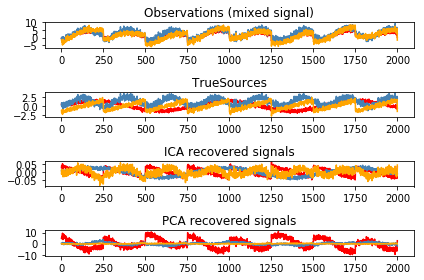

In [35]:
#plot result
plt.figure(figsize=[10,8])

models = [X, s, s_, H]
names = ['Observations (mixed signal)', 'TrueSources', 'ICA recovered signals','PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4,1,ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)
        
plt.tight_layout()
plt.show()

In [37]:
import wave
ICA_mix_1_wave = wave.open('C://Users/naikp/Downloads/ICA mix 1.wav')
signal_1_raw = ICA_mix_1_wave.readframes(-1)
signal_1 = np.fromstring(signal_1_raw, 'Int16')
'length:' , len(signal_1), 'first 100 elements:' , signal_1[0:100]

C:\Users\naikp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  after removing the cwd from sys.path.
C:\Users\naikp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


('length:',
 264515,
 'first 100 elements:',
 array([  879,  1268,  1460,  1756,  1943,  2216,  2407,  2668,  2866,
         3106,  3308,  3546,  3752,  3981,  4175,  4395,  4588,  4790,
         4966,  5146,  5292,  5436,  5550,  5643,  5717,  5759,  5790,
         5798,  5789,  5756,  5713,  5649,  5576,  5478,  5381,  5267,
         5146,  4999,  4856,  4682,  4502,  4308,  4097,  3875,  3637,
         3380,  3107,  2825,  2514,  2194,  1847,  1472,  1087,   671,
          227,  -219,  -691, -1176, -1666, -2167, -2669, -3179, -3668,
        -4170, -4643, -5116, -5559, -5985, -6380, -6765, -7105, -7422,
        -7706, -7955, -8163, -8339, -8470, -8557, -8600, -8618, -8585,
        -8524, -8425, -8298, -8129, -7947, -7720, -7475, -7205, -6916,
        -6606, -6266, -5922, -5556, -5165, -4774, -4353, -3922, -3476,
        -3021], dtype=int16))

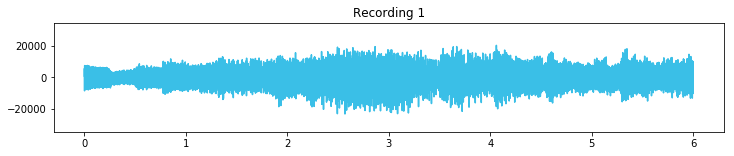

In [38]:
fs = ICA_mix_1_wave.getframerate()
timing = np.linspace(0, len(signal_1)/fs, num = len(signal_1))

plt.figure(figsize=(12,2))
plt.title('Recording 1')
plt.plot(timing, signal_1, c='#3ABFE7')
plt.ylim(-35000,35000)
plt.show()

In [39]:
ICA_mix_2_wave = wave.open('C://Users/naikp/Downloads/ICA mix 2.wav')
signal_2_raw = ICA_mix_2_wave.readframes(-1)
signal_2 = np.fromstring(signal_2_raw, 'Int16')
'length:' , len(signal_2), 'first 100 elements:' , signal_2[:100]

C:\Users\naikp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\naikp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


('length:',
 264515,
 'first 100 elements:',
 array([   157,    899,   1610,   2325,   3022,   3718,   4386,   5056,
          5690,   6318,   6912,   7487,   8035,   8550,   9036,   9488,
          9904,  10286,  10624,  10928,  11181,  11403,  11565,  11697,
         11770,  11804,  11791,  11730,  11626,  11476,  11281,  11045,
         10766,  10444,  10087,   9689,   9254,   8789,   8281,   7753,
          7184,   6596,   5977,   5340,   4676,   3999,   3300,   2595,
          1868,   1146,    402,   -335,  -1079,  -1821,  -2560,  -3289,
         -4012,  -4718,  -5411,  -6086,  -6734,  -7366,  -7960,  -8533,
         -9069,  -9571, -10035, -10461, -10842, -11187, -11481, -11733,
        -11939, -12092, -12205, -12258, -12275, -12228, -12140, -12005,
        -11813, -11586, -11302, -10985, -10613, -10213,  -9759,  -9281,
         -8756,  -8207,  -7621,  -7008,  -6370,  -5706,  -5021,  -4318,
         -3597,  -2865,  -2117,  -1366], dtype=int16))

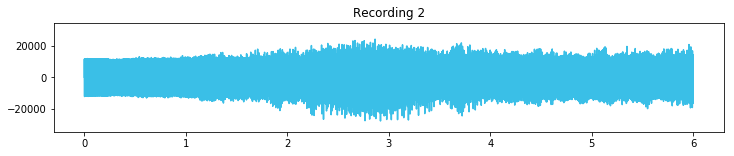

In [40]:
fs = ICA_mix_2_wave.getframerate()
timing = np.linspace(0, len(signal_2)/fs, num = len(signal_2))

plt.figure(figsize=(12,2))
plt.title('Recording 2')
plt.plot(timing, signal_2, c='#3ABFE7')
plt.ylim(-35000,35000)
plt.show()

In [42]:
ICA_mix_3_wave = wave.open('C://Users/naikp/Downloads/ICA mix 3.wav')
signal_3_raw = ICA_mix_3_wave.readframes(-1)
signal_3 = np.fromstring(signal_3_raw, 'Int16')
'length:' , len(signal_3), 'first 100 elements:' , signal_3[:100]

C:\Users\naikp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\naikp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


('length:',
 264515,
 'first 100 elements:',
 array([   879,   2584,   4081,   5682,   7147,   8689,  10114,  11583,
         12954,  14327,  15618,  16897,  18090,  19250,  20317,  21345,
         22281,  23152,  23932,  24632,  25234,  25742,  26153,  26450,
         26656,  26742,  26738,  26627,  26416,  26103,  25696,  25195,
         24601,  23916,  23151,  22308,  21378,  20375,  19301,  18147,
         16935,  15654,  14315,  12927,  11483,   9992,   8461,   6891,
          5289,   3656,   1998,    305,  -1387,  -3108,  -4831,  -6550,
         -8259,  -9956, -11623, -13260, -14859, -16412, -17900, -19333,
        -20692, -21975, -23172, -24274, -25280, -26199, -26995, -27695,
        -28275, -28746, -29089, -29324, -29424, -29404, -29255, -28999,
        -28617, -28118, -27521, -26797, -25988, -25064, -24056, -22948,
        -21757, -20499, -19153, -17741, -16273, -14736, -13156, -11523,
         -9851,  -8140,  -6393,  -4636], dtype=int16))

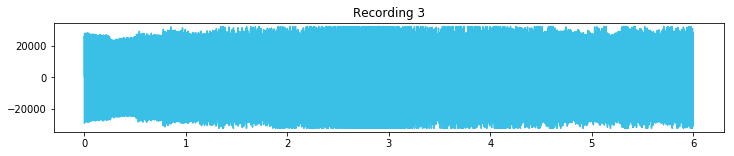

In [43]:
fs = ICA_mix_3_wave.getframerate()
timing = np.linspace(0, len(signal_3)/fs, num = len(signal_3))

plt.figure(figsize=(12,2))
plt.title('Recording 3')
plt.plot(timing, signal_3, c='#3ABFE7')
plt.ylim(-35000,35000)
plt.show()

In [44]:
X = list(zip(signal_1, signal_2, signal_3))
X[:10]

[(879, 157, 879),
 (1268, 899, 2584),
 (1460, 1610, 4081),
 (1756, 2325, 5682),
 (1943, 3022, 7147),
 (2216, 3718, 8689),
 (2407, 4386, 10114),
 (2668, 5056, 11583),
 (2866, 5690, 12954),
 (3106, 6318, 14327)]

In [45]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=3)
ica_result = ica.fit_transform(X)

In [46]:
result_signal_1 = ica_result[:,0]
result_signal_2 = ica_result[:,1]
result_signal_3 = ica_result[:,2]

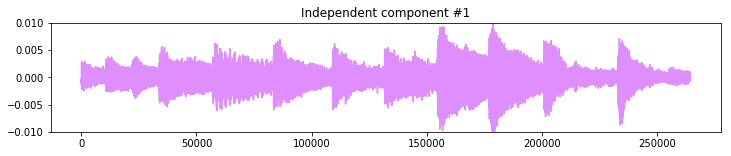

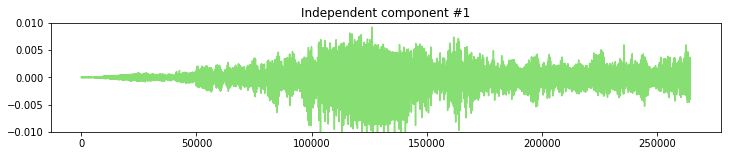

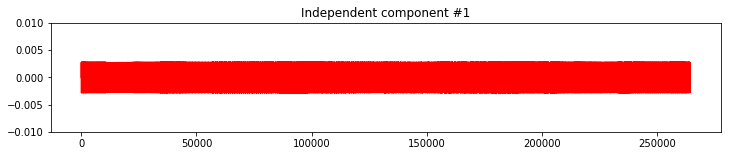

In [48]:
plt.figure(figsize=(12,2))
plt.title('Independent component #1')
plt.plot(result_signal_1, c='#df8efd')
plt.ylim(-0.010, 0.010)
plt.show()

plt.figure(figsize=(12,2))
plt.title('Independent component #1')
plt.plot(result_signal_2, c='#87de72')
plt.ylim(-0.010, 0.010)
plt.show()

plt.figure(figsize=(12,2))
plt.title('Independent component #1')
plt.plot(result_signal_3, c='red')
plt.ylim(-0.010, 0.010)
plt.show()

In [49]:
#To save wave files
#convert to int. map the appropriate range and increase the volume a little bit
result_signal_1_int = np.int16(result_signal_1*32767*100)
result_signal_2_int = np.int16(result_signal_2*32767*100)
result_signal_3_int = np.int16(result_signal_3*32767*100)

In [52]:
from scipy.io import wavfile
wavfile.write("C://Users/naikp/Downloads/ICA_result_signal_1.wav", fs, result_signal_1_int)
wavfile.write("C://Users/naikp/Downloads/ICA_result_signal_2.wav", fs, result_signal_2_int)
wavfile.write("C://Users/naikp/Downloads/ICA_result_signal_3.wav", fs, result_signal_3_int)